<a href="https://colab.research.google.com/github/ImajiPietersz/FYP/blob/main/GAN_Experiments/GAN_Experiment_Combine_LoRaWAN_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATASET_PATH = '/content/drive/MyDrive/LoRaWANdataset/machine2WithNoise.csv'
IMP_COL = ['XOAVelocity', 'XPeakmg', 'XRMSmg', 'XKurtosis',
       'XCrestFactor', 'XSkewness', 'XDeviation', 'XPeaktoPeakDisplacement',
       'YOAVelocity', 'YPeakmg', 'YRMSmg', 'ZOAVelocity', 'ZPeakmg', 'ZRMSmg','converted', 'target']
X_COL = ['XOAVelocity', 'XPeakmg', 'XRMSmg', 'XKurtosis',
       'XCrestFactor', 'XSkewness', 'XDeviation', 'XPeaktoPeakDisplacement',
       'YOAVelocity', 'YPeakmg', 'YRMSmg', 'ZOAVelocity', 'ZPeakmg','converted', 'ZRMSmg']
TAR_COL = 'target'

In [ ]:
df = pd.read_csv(DATASET_PATH)[IMP_COL]
df

,XOAVelocity,XPeakmg,XRMSmg,XKurtosis,XCrestFactor,XSkewness,XDeviation,XPeaktoPeakDisplacement,YOAVelocity,YPeakmg,YRMSmg,ZOAVelocity,ZPeakmg,ZRMSmg,converted,target
0,7,18,13,-5,38,-4,8,1,8,11,8,20,156,111,2022-12-12 05:13,0
1,67,183,130,22,197,8,531,6,38,137,97,85,390,276,2022-12-12 05:19,0
2,20,48,34,-3,203,1,204,2,18,36,26,63,216,153,2022-12-12 05:19,0
3,218,305,216,-36,132,-5,291,23,232,306,217,132,117,83,2022-12-12 05:19,0
4,9,18,13,3,1039,-1,8,1,9,12,9,16,107,76,2022-12-12 05:43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,58,91,65,-15,925,-1,26,4,58,77,55,157,871,616,2023-05-04 04:43,0
3842,30,76,54,-5,1201,0,373,3,36,72,51,101,265,188,2023-05-04 04:48,0
3843,63,169,120,512,3043,5,583,8,186,422,299,188,405,287,2023-05-04 04:50,0
3844,170,162,115,68,936,0,227,22,265,214,152,460,237,168,2023-05-04 04:50,0


In [ ]:
df = df. sort_values(by=["converted"])
df = df.reset_index(drop=True)

df = df.drop(['converted'], axis=1)
df['target2'] = df['target'].apply(lambda x: 1 if x == 0 else 0)
df

,XOAVelocity,XPeakmg,XRMSmg,XKurtosis,XCrestFactor,XSkewness,XDeviation,XPeaktoPeakDisplacement,YOAVelocity,YPeakmg,YRMSmg,ZOAVelocity,ZPeakmg,ZRMSmg,target,target2
0,8,14,10,-12,2400,0,7,1,8,11,8,17,83,59,1,0
1,8,14,10,-12,2400,0,7,1,8,11,8,17,83,59,1,0
2,8,14,10,-12,2400,0,7,1,8,11,8,17,83,59,1,0
3,221,147,104,82,119,-11,334,23,261,179,127,64,91,65,1,0
4,88,231,164,33,17,-1,518,9,55,165,117,139,725,513,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,58,91,65,-15,925,-1,26,4,58,77,55,157,871,616,0,1
3842,30,76,54,-5,1201,0,373,3,36,72,51,101,265,188,0,1
3843,170,162,115,68,936,0,227,22,265,214,152,460,237,168,0,1
3844,63,169,120,512,3043,5,583,8,186,422,299,188,405,287,0,1


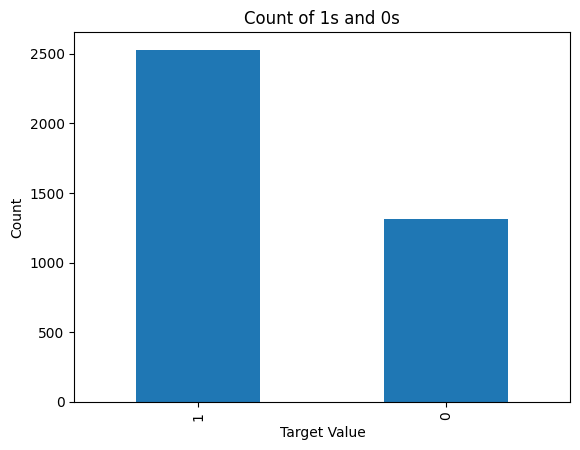

1    2529
0    1317
Name: target, dtype: int64


In [ ]:
target_counts = df['target'].value_counts()

# Create a bar chart of the counts
target_counts.plot.bar()

# Add labels and title to the chart
plt.title('Count of 1s and 0s')
plt.xlabel('Target Value')
plt.ylabel('Count')

# Display the chart
plt.show()
print(target_counts)

<ipython-input-6-2d366cf5db0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.target -= 1
<ipython-input-6-2d366cf5db0b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.target *= 40


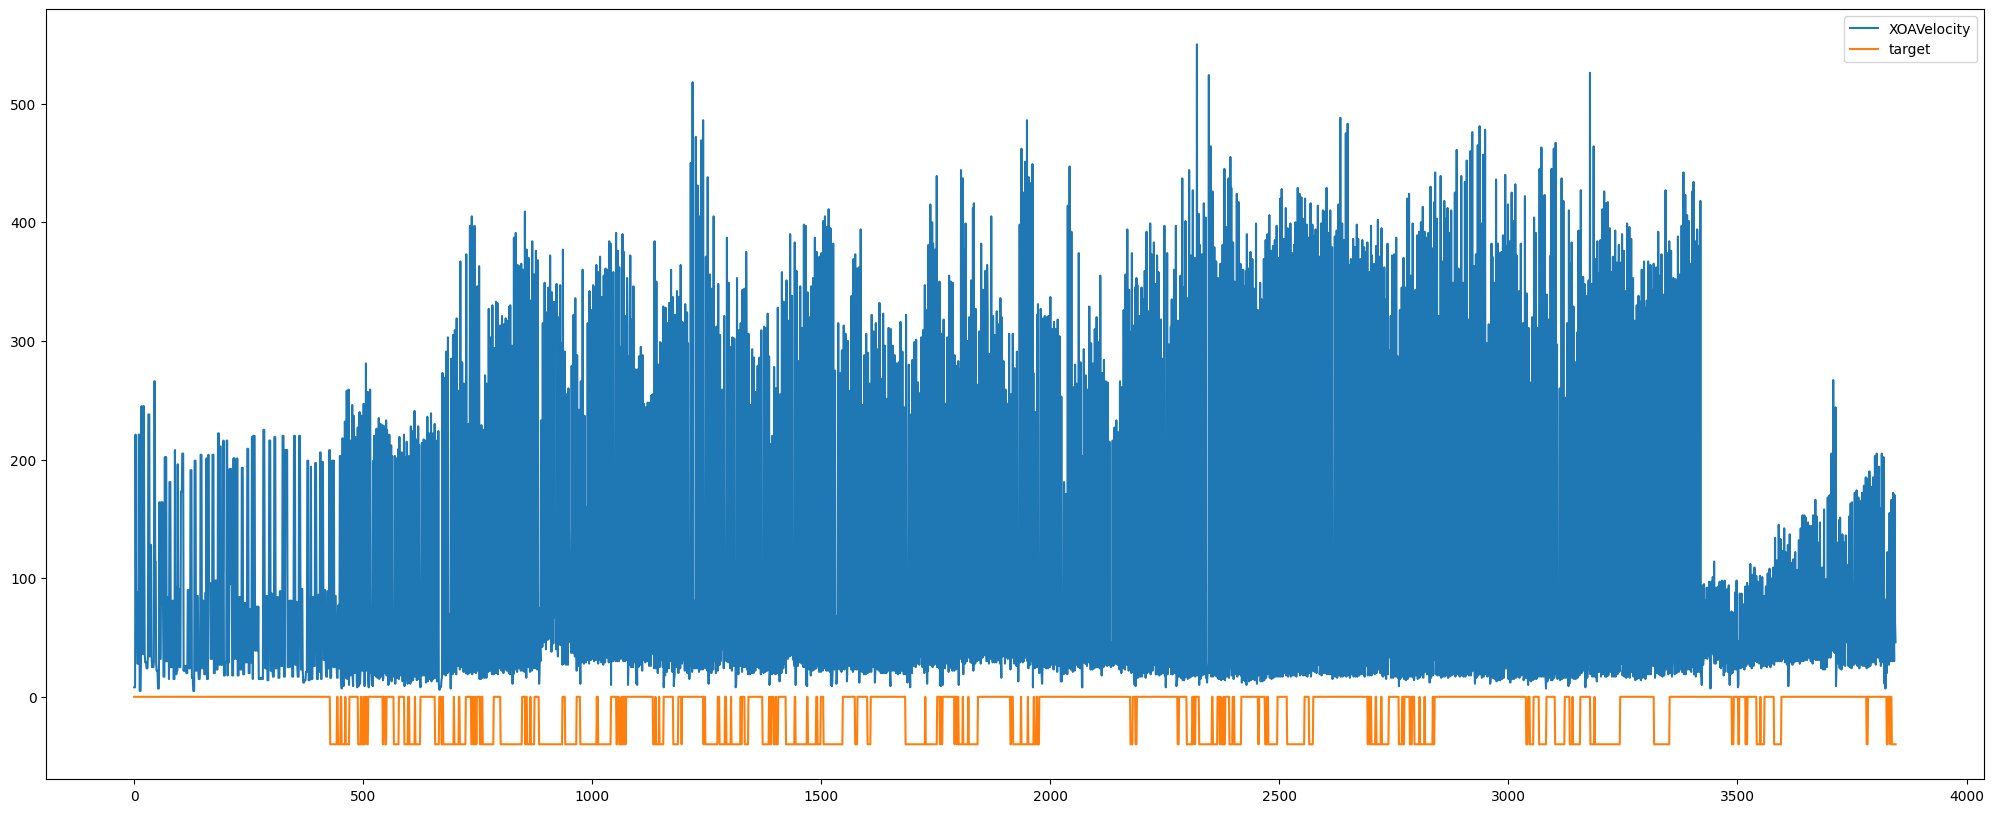

In [ ]:
df1 = df.drop(['XCrestFactor','ZPeakmg','ZRMSmg'], axis=1)
df1 = df[['XOAVelocity','target']]
df1.target -= 1
df1.target *= 40
plt.figure(figsize=(25,10)) 
plt.plot(df1)
plt.legend(df1.columns)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns)
df


,XOAVelocity,XPeakmg,XRMSmg,XKurtosis,XCrestFactor,XSkewness,XDeviation,XPeaktoPeakDisplacement,YOAVelocity,YPeakmg,YRMSmg,ZOAVelocity,ZPeakmg,ZRMSmg,target,target2
0,0.005505,0.020737,0.019544,0.028571,0.325556,0.269565,0.003889,0.017241,0.004769,0.010345,0.009756,0.021401,0.025862,0.025785,1.0,0.0
1,0.005505,0.020737,0.019544,0.028571,0.325556,0.269565,0.003889,0.017241,0.004769,0.010345,0.009756,0.021401,0.025862,0.025785,1.0,0.0
2,0.005505,0.020737,0.019544,0.028571,0.325556,0.269565,0.003889,0.017241,0.004769,0.010345,0.009756,0.021401,0.025862,0.025785,1.0,0.0
3,0.396330,0.327189,0.325733,0.049231,0.016142,0.221739,0.185556,0.396552,0.406995,0.300000,0.300000,0.112840,0.028515,0.028598,1.0,0.0
4,0.152294,0.520737,0.521173,0.038462,0.002306,0.265217,0.287778,0.155172,0.079491,0.275862,0.275610,0.258755,0.238727,0.238631,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,0.097248,0.198157,0.198697,0.027912,0.125475,0.265217,0.014444,0.068966,0.084261,0.124138,0.124390,0.293774,0.287135,0.286920,0.0,1.0
3842,0.045872,0.163594,0.162866,0.030110,0.162914,0.269565,0.207222,0.051724,0.049285,0.115517,0.114634,0.184825,0.086207,0.086263,0.0,1.0
3843,0.302752,0.361751,0.361564,0.046154,0.126967,0.269565,0.126111,0.379310,0.413355,0.360345,0.360976,0.883268,0.076923,0.076887,0.0,1.0
3844,0.106422,0.377880,0.377850,0.143736,0.412778,0.291304,0.323889,0.137931,0.287758,0.718966,0.719512,0.354086,0.132626,0.132677,0.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
frames = df[['XOAVelocity', 'XPeakmg', 'XRMSmg', 'XKurtosis', 'XCrestFactor',
       'XSkewness', 'XDeviation', 'XPeaktoPeakDisplacement', 'YOAVelocity',
       'YPeakmg', 'YRMSmg', 'ZOAVelocity', 'ZPeakmg', 'ZRMSmg']].values
labels = df[['target', 'target2']].values
train_data,test_data, train_labels, test_labels =  train_test_split(frames, labels,train_size=0.7, random_state=42 )
print(len(train_data))
print(len(test_data))
print(len(train_labels))
print(len(test_labels))

2692
1154
2692
1154


In [ ]:
def plotUsingAutoEncoder(model,df):

  denoised_all = []

  for _,frame in df.iterrows():
    row_array = frame.values[:14]
    encoded_data = model.encoder(np.array([row_array])).numpy()
    [values] = model.decoder(encoded_data).numpy()
    denoised_all.append(values)
  separated_XOAVelocity = [x[0] for x in denoised_all]
  separated_XPeakmg = [x[1] for x in denoised_all]
  separated_XRMSmg = [x[2] for x in denoised_all]
  separated_XKurtosis = [x[3] for x in denoised_all]
  separated_XCrestFactor = [x[4] for x in denoised_all]
  separated_XSkewness = [x[5] for x in denoised_all]
  separated_XDeviation = [x[6] for x in denoised_all]
  separated_XPeaktoPeakDisplacement = [x[7] for x in denoised_all]
  separated_YOAVelocity = [x[8] for x in denoised_all]
  separated_YPeakmg = [x[9] for x in denoised_all]
  separated_YRMSmg = [x[10] for x in denoised_all]
  separated_ZOAVelocity = [x[11] for x in denoised_all]
  separated_ZPeakmg = [x[12] for x in denoised_all]
  separated_ZRMSmg = [x[13] for x in denoised_all]
  
  df['separated_XOAVelocity'] = pd.DataFrame(separated_XOAVelocity, columns=['separated_XOAVelocity']) 
  df['separated_XPeakmg'] = pd.DataFrame(separated_XOAVelocity, columns=['separated_XPeakmg'])
  df['separated_XRMSmg'] = pd.DataFrame(separated_XOAVelocity, columns=['separated_XRMSmg']) 
  df['separated_XKurtosis'] = pd.DataFrame(separated_XOAVelocity, columns=['separated_XKurtosis']) 
  df['separated_XCrestFactor'] = pd.DataFrame(separated_XOAVelocity, columns=['separated_XCrestFactor']) 
  df['separated_XSkewness'] = pd.DataFrame(separated_XOAVelocity, columns=['separated_XSkewness']) 
  df['separated_XDeviation'] = pd.DataFrame(separated_XOAVelocity, columns=['separated_XDeviation']) 
  df['separated_XPeaktoPeakDisplacement'] = pd.DataFrame(separated_XOAVelocity, columns=['separated_XPeaktoPeakDisplacement']) 
  df['separated_YOAVelocity'] = pd.DataFrame(separated_XOAVelocity, columns=['separated_YOAVelocity'])
  df['separated_YPeakmg'] = pd.DataFrame(separated_XOAVelocity, columns=['separated_YPeakmg']) 
  df['separated_YRMSmg'] = pd.DataFrame(separated_XOAVelocity, columns=['separated_YRMSmg']) 
  df['separated_ZOAVelocity'] = pd.DataFrame(separated_XOAVelocity, columns=['separated_ZOAVelocity']) 
  df['separated_ZPeakmg'] = pd.DataFrame(separated_XOAVelocity, columns=['separated_ZPeakmg']) 
  df['separated_ZRMSmg'] = pd.DataFrame(separated_XOAVelocity, columns=['separated_ZRMSmg']) 
   
  scaler.fit(df.values)
  df = pd.DataFrame(scaler.inverse_transform(df.values), columns=df.columns)
  noise = df[['XOAVelocity']].values.flatten()
  seperated = df[['separated_XOAVelocity']].values.flatten()

  plt.figure(figsize=(20,5)) 
  plt.plot(noise)
  plt.plot(seperated, color="red")
  plt.legend(labels=["Input", "Reconstruction" ])
  plt.show()

#*_With 1D 2 CNN Layers & 1 Dense Layer - Leaky ReLU activation function_*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])
    

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(4, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


Epoch 1/300
85/85 [==============================] - 2s 6ms/step - loss: 0.6636 - accuracy: 0.6408 - val_loss: 0.6327 - val_accuracy: 0.6716
Epoch 2/300
85/85 [==============================] - 0s 3ms/step - loss: 0.6446 - accuracy: 0.6516 - val_loss: 0.6332 - val_accuracy: 0.6716
Epoch 3/300
85/85 [==============================] - 0s 3ms/step - loss: 0.6414 - accuracy: 0.6516 - val_loss: 0.6292 - val_accuracy: 0.6716
Epoch 4/300
85/85 [==============================] - 0s 3ms/step - loss: 0.6385 - accuracy: 0.6516 - val_loss: 0.6320 - val_accuracy: 0.6716
Epoch 5/300
85/85 [==============================] - 0s 3ms/step - loss: 0.6359 - accuracy: 0.6516 - val_loss: 0.6286 - val_accuracy: 0.6716
Epoch 6/300
85/85 [==============================] - 0s 3ms/step - loss: 0.6326 - accuracy: 0.6512 - val_loss: 0.6256 - val_accuracy: 0.6716
Epoch 7/300
85/85 [==============================] - 0s 3ms/step - loss: 0.6309 - accuracy: 0.6516 - val_loss: 0.6248 - val_accuracy: 0.6716
Epoch 8/300
8

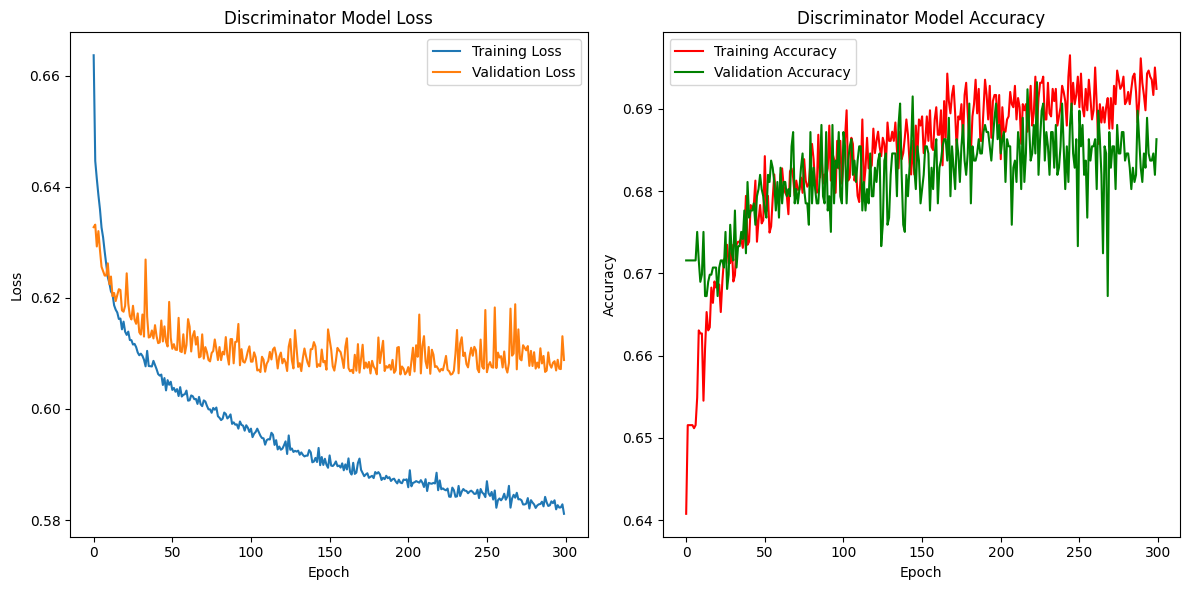

In [ ]:
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the training loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Discriminator Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot the training accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy', color='red')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
ax2.set_title('Discriminator Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
max_epochs = 30
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE
Epoch 1 Starting
Epoch 1 DONE
Epoch 2 Starting
Epoch 2 DONE
Epoch 3 Starting
Epoch 3 DONE
Epoch 4 Starting
Epoch 4 DONE
Epoch 5 Starting
Epoch 5 DONE
Epoch 6 Starting
Epoch 6 DONE
Epoch 7 Starting
Epoch 7 DONE
Epoch 8 Starting
Epoch 8 DONE
Epoch 9 Starting
Epoch 9 DONE
Epoch 10 Starting
Epoch 10 DONE
Epoch 11 Starting
Epoch 11 DONE
Epoch 12 Starting
Epoch 12 DONE
Epoch 13 Starting
Epoch 13 DONE
Epoch 14 Starting
Epoch 14 DONE
Epoch 15 Starting
Epoch 15 DONE
Epoch 16 Starting
Epoch 16 DONE
Epoch 17 Starting
Epoch 17 DONE
Epoch 18 Starting
Epoch 18 DONE
Epoch 19 Starting
Epoch 19 DONE
Epoch 20 Starting
Epoch 20 DONE
Epoch 21 Starting
Epoch 21 DONE
Epoch 22 Starting
Epoch 22 DONE
Epoch 23 Starting
Epoch 23 DONE
Epoch 24 Starting
Epoch 24 DONE
Epoch 25 Starting
Epoch 25 DONE
Epoch 26 Starting
Epoch 26 DONE
Epoch 27 Starting
Epoch 27 DONE
Epoch 28 Starting
Epoch 28 DONE
Epoch 29 Starting
Epoch 29 DONE


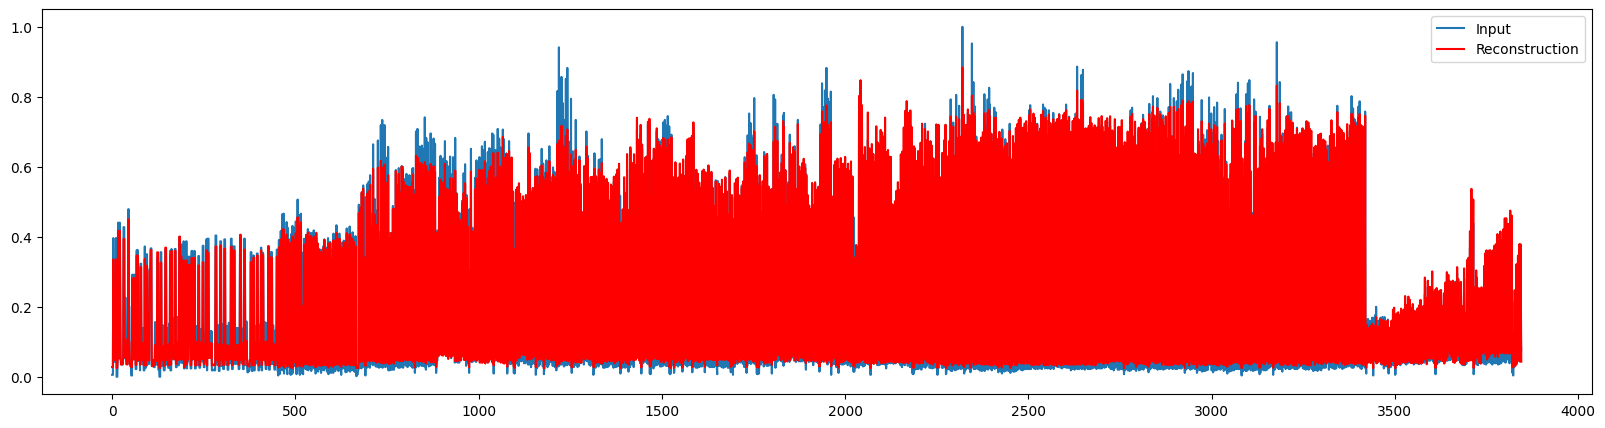

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

30


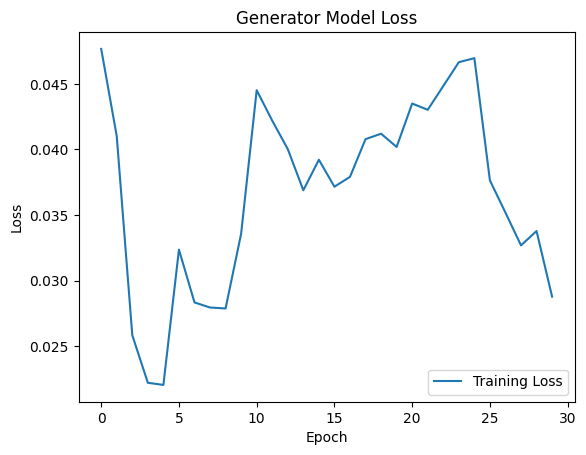

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3310].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise
length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

6.9470596262876105


#*__With 1D 2 CNN Layers & 1 Dense Layer - Leaky ReLU activation function__*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


Epoch 1/300
85/85 [==============================] - 2s 7ms/step - loss: 0.6582 - accuracy: 0.6508 - val_loss: 0.6351 - val_accuracy: 0.6716
Epoch 2/300
85/85 [==============================] - 0s 3ms/step - loss: 0.6445 - accuracy: 0.6516 - val_loss: 0.6308 - val_accuracy: 0.6716
Epoch 3/300
85/85 [==============================] - 0s 5ms/step - loss: 0.6400 - accuracy: 0.6516 - val_loss: 0.6287 - val_accuracy: 0.6716
Epoch 4/300
85/85 [==============================] - 0s 5ms/step - loss: 0.6361 - accuracy: 0.6519 - val_loss: 0.6337 - val_accuracy: 0.6759
Epoch 5/300
85/85 [==============================] - 1s 6ms/step - loss: 0.6321 - accuracy: 0.6568 - val_loss: 0.6297 - val_accuracy: 0.6716
Epoch 6/300
85/85 [==============================] - 1s 6ms/step - loss: 0.6317 - accuracy: 0.6560 - val_loss: 0.6258 - val_accuracy: 0.6768
Epoch 7/300
85/85 [==============================] - 0s 5ms/step - loss: 0.6272 - accuracy: 0.6542 - val_loss: 0.6265 - val_accuracy: 0.6733
Epoch 8/300
8

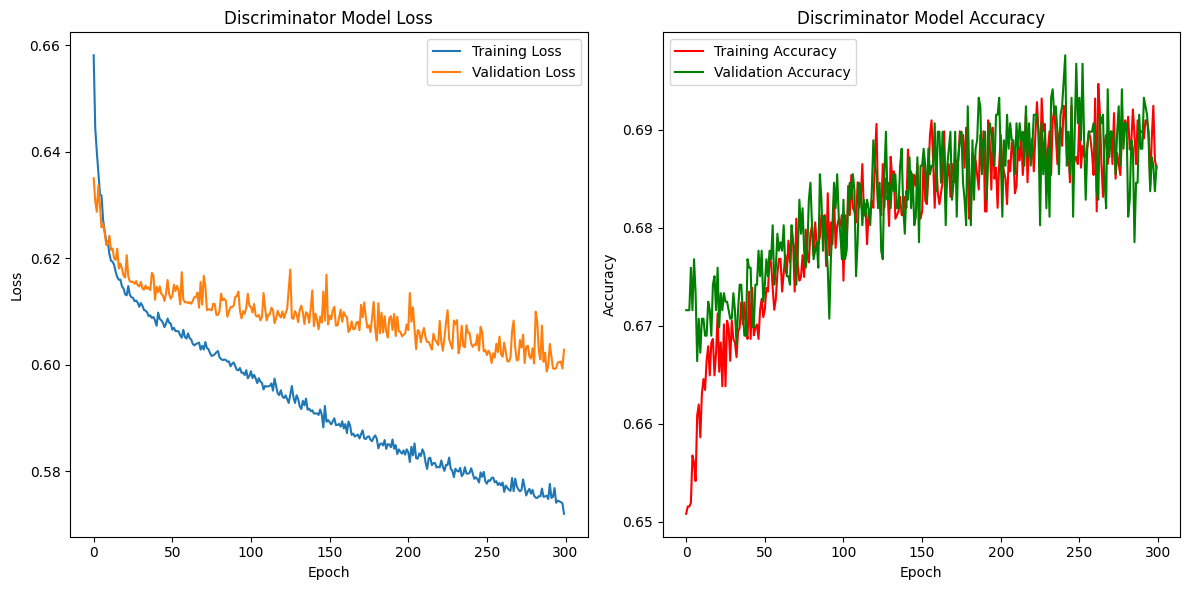

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Discriminator Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(history.history['accuracy'], label='Training Accuracy', color='red')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
ax2.set_title('Discriminator Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()

plt.show()


In [ ]:
max_epochs = 30
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE
Epoch 1 Starting
Epoch 1 DONE
Epoch 2 Starting
Epoch 2 DONE
Epoch 3 Starting
Epoch 3 DONE
Epoch 4 Starting
Epoch 4 DONE
Epoch 5 Starting
Epoch 5 DONE
Epoch 6 Starting
Epoch 6 DONE
Epoch 7 Starting
Epoch 7 DONE
Epoch 8 Starting
Epoch 8 DONE
Epoch 9 Starting
Epoch 9 DONE
Epoch 10 Starting
Epoch 10 DONE
Epoch 11 Starting
Epoch 11 DONE
Epoch 12 Starting
Epoch 12 DONE
Epoch 13 Starting
Epoch 13 DONE
Epoch 14 Starting
Epoch 14 DONE
Epoch 15 Starting
Epoch 15 DONE
Epoch 16 Starting
Epoch 16 DONE
Epoch 17 Starting
Epoch 17 DONE
Epoch 18 Starting
Epoch 18 DONE
Epoch 19 Starting
Epoch 19 DONE
Epoch 20 Starting
Epoch 20 DONE
Epoch 21 Starting
Epoch 21 DONE
Epoch 22 Starting
Epoch 22 DONE
Epoch 23 Starting
Epoch 23 DONE
Epoch 24 Starting
Epoch 24 DONE
Epoch 25 Starting
Epoch 25 DONE
Epoch 26 Starting
Epoch 26 DONE
Epoch 27 Starting
Epoch 27 DONE
Epoch 28 Starting
Epoch 28 DONE
Epoch 29 Starting
Epoch 29 DONE


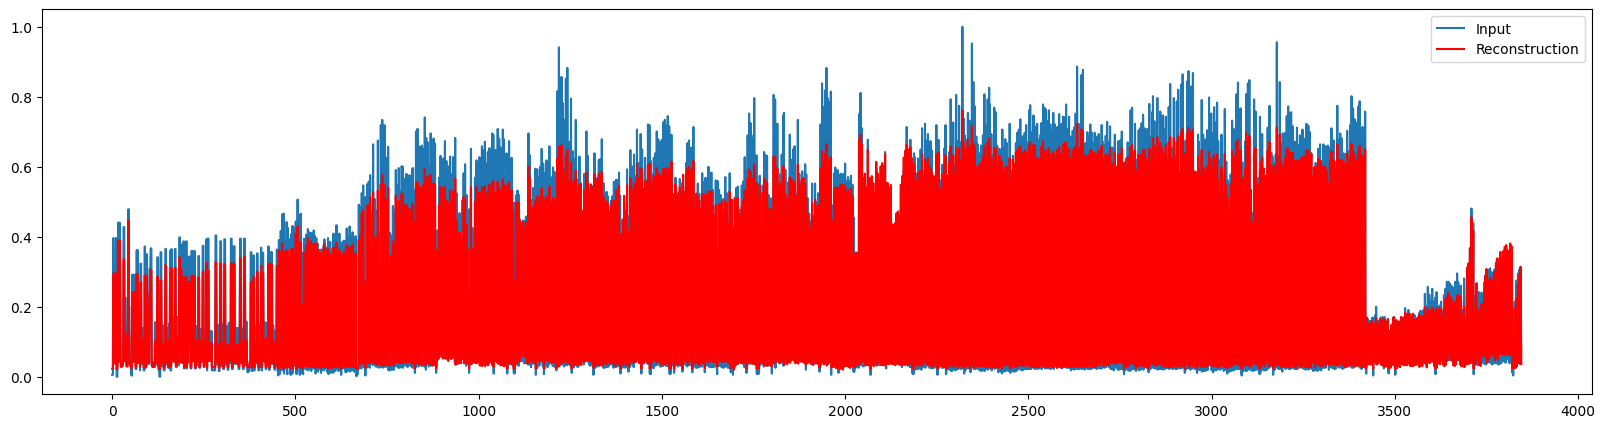

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

30


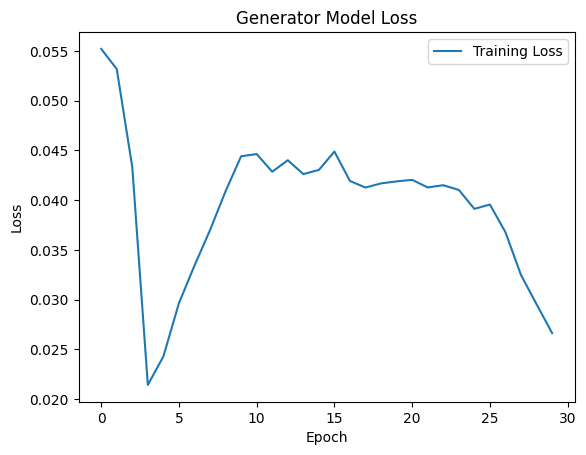

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3310].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

6.588834607222004


#*_With 1D 2 CNN Layers & 2 Dense Layer - Leaky ReLU activation function_*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(6,activation='LeakyReLU'),
        tf.keras.layers.Dense(2,activation='softmax'),
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(6, activation="LeakyReLU"),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(6, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


Epoch 1/300
85/85 [==============================] - 2s 7ms/step - loss: 0.6711 - accuracy: 0.6244 - val_loss: 0.6409 - val_accuracy: 0.6716
Epoch 2/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6489 - accuracy: 0.6516 - val_loss: 0.6335 - val_accuracy: 0.6716
Epoch 3/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6441 - accuracy: 0.6516 - val_loss: 0.6302 - val_accuracy: 0.6716
Epoch 4/300
85/85 [==============================] - 0s 3ms/step - loss: 0.6415 - accuracy: 0.6516 - val_loss: 0.6288 - val_accuracy: 0.6716
Epoch 5/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6377 - accuracy: 0.6516 - val_loss: 0.6318 - val_accuracy: 0.6716
Epoch 6/300
85/85 [==============================] - 0s 3ms/step - loss: 0.6335 - accuracy: 0.6516 - val_loss: 0.6243 - val_accuracy: 0.6716
Epoch 7/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6317 - accuracy: 0.6519 - val_loss: 0.6228 - val_accuracy: 0.6724
Epoch 8/300
8

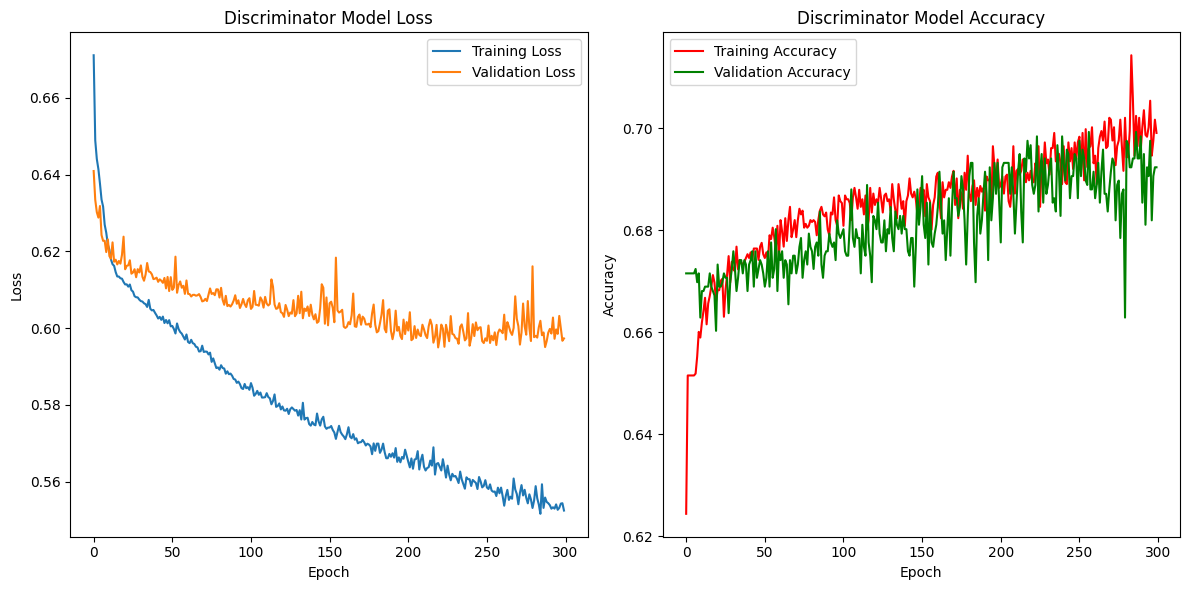

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Discriminator Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(history.history['accuracy'], label='Training Accuracy', color='red')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
ax2.set_title('Discriminator Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()

plt.show()

In [ ]:
max_epochs = 30
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE
Epoch 1 Starting
Epoch 1 DONE
Epoch 2 Starting
Epoch 2 DONE
Epoch 3 Starting
Epoch 3 DONE
Epoch 4 Starting
Epoch 4 DONE
Epoch 5 Starting
Epoch 5 DONE
Epoch 6 Starting
Epoch 6 DONE
Epoch 7 Starting
Epoch 7 DONE
Epoch 8 Starting
Epoch 8 DONE
Epoch 9 Starting
Epoch 9 DONE
Epoch 10 Starting
Epoch 10 DONE
Epoch 11 Starting
Epoch 11 DONE
Epoch 12 Starting
Epoch 12 DONE
Epoch 13 Starting
Epoch 13 DONE
Epoch 14 Starting
Epoch 14 DONE
Epoch 15 Starting
Epoch 15 DONE
Epoch 16 Starting
Epoch 16 DONE
Epoch 17 Starting
Epoch 17 DONE
Epoch 18 Starting
Epoch 18 DONE
Epoch 19 Starting
Epoch 19 DONE
Epoch 20 Starting
Epoch 20 DONE
Epoch 21 Starting
Epoch 21 DONE
Epoch 22 Starting
Epoch 22 DONE
Epoch 23 Starting
Epoch 23 DONE
Epoch 24 Starting
Epoch 24 DONE
Epoch 25 Starting
Epoch 25 DONE
Epoch 26 Starting
Epoch 26 DONE
Epoch 27 Starting
Epoch 27 DONE
Epoch 28 Starting
Epoch 28 DONE
Epoch 29 Starting
Epoch 29 DONE


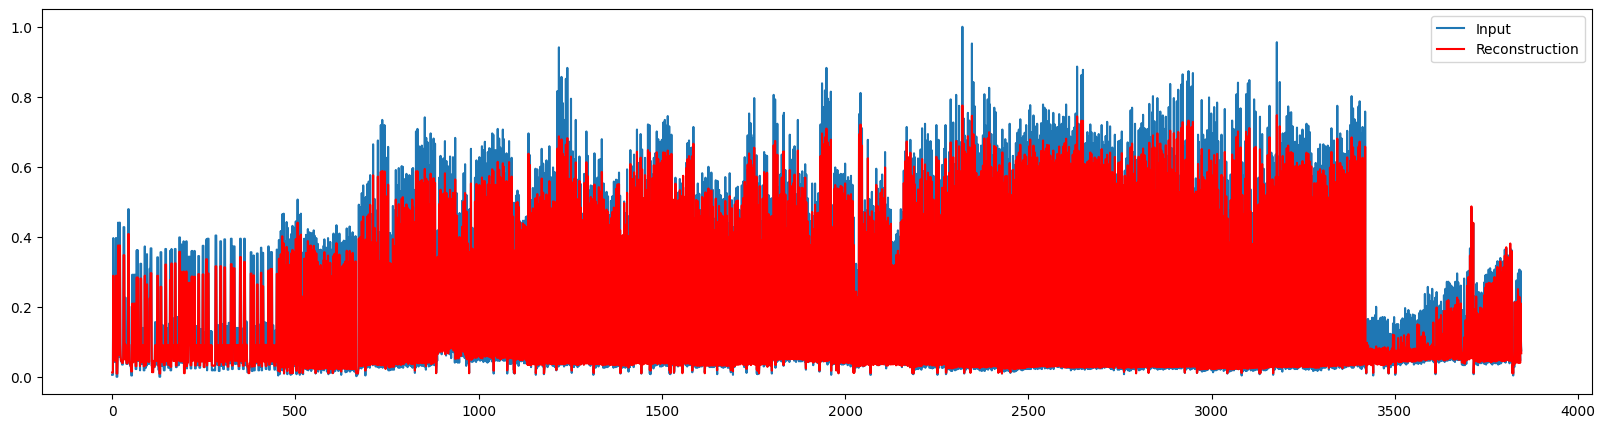

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

30


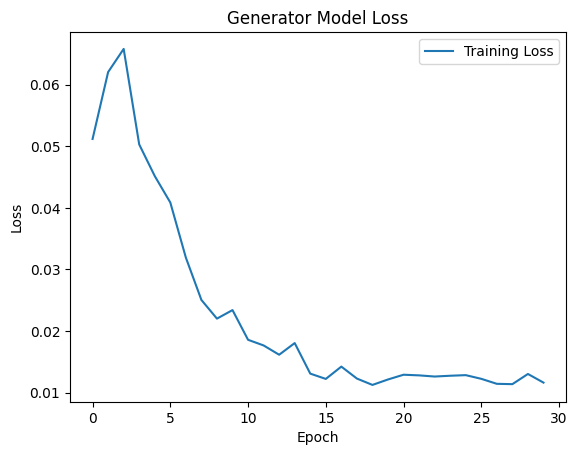

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3310].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

6.342272600756871


#*_With 1D 2 CNN Layers & 2 Dense Layer - Leaky ReLU activation function_*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(5,activation='LeakyReLU'),
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(10, activation="LeakyReLU"),
      tf.keras.layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


Epoch 1/300
85/85 [==============================] - 1s 5ms/step - loss: 0.6568 - accuracy: 0.6490 - val_loss: 0.6334 - val_accuracy: 0.6716
Epoch 2/300
85/85 [==============================] - 0s 3ms/step - loss: 0.6458 - accuracy: 0.6516 - val_loss: 0.6323 - val_accuracy: 0.6716
Epoch 3/300
85/85 [==============================] - 0s 3ms/step - loss: 0.6409 - accuracy: 0.6516 - val_loss: 0.6273 - val_accuracy: 0.6716
Epoch 4/300
85/85 [==============================] - 0s 3ms/step - loss: 0.6358 - accuracy: 0.6516 - val_loss: 0.6306 - val_accuracy: 0.6733
Epoch 5/300
85/85 [==============================] - 0s 3ms/step - loss: 0.6319 - accuracy: 0.6516 - val_loss: 0.6232 - val_accuracy: 0.6750
Epoch 6/300
85/85 [==============================] - 0s 3ms/step - loss: 0.6267 - accuracy: 0.6542 - val_loss: 0.6225 - val_accuracy: 0.6681
Epoch 7/300
85/85 [==============================] - 0s 3ms/step - loss: 0.6234 - accuracy: 0.6597 - val_loss: 0.6261 - val_accuracy: 0.6638
Epoch 8/300
8

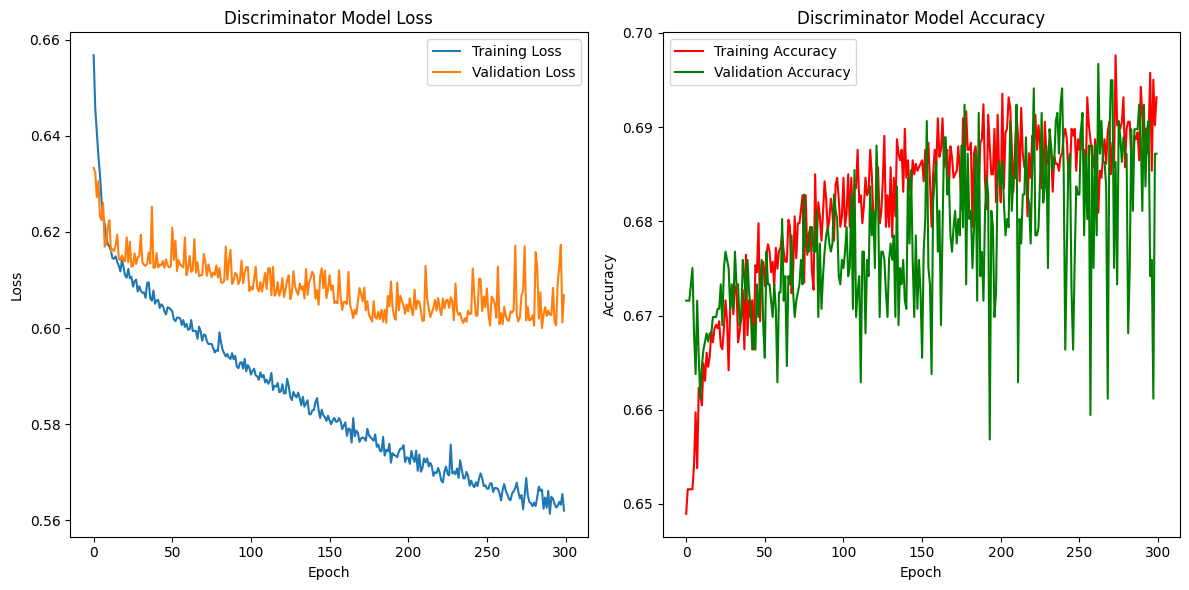

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Discriminator Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(history.history['accuracy'], label='Training Accuracy', color='red')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
ax2.set_title('Discriminator Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()

plt.show()

In [ ]:
max_epochs = 30
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE
Epoch 1 Starting
Epoch 1 DONE
Epoch 2 Starting
Epoch 2 DONE
Epoch 3 Starting
Epoch 3 DONE
Epoch 4 Starting
Epoch 4 DONE
Epoch 5 Starting
Epoch 5 DONE
Epoch 6 Starting
Epoch 6 DONE
Epoch 7 Starting
Epoch 7 DONE
Epoch 8 Starting
Epoch 8 DONE
Epoch 9 Starting
Epoch 9 DONE
Epoch 10 Starting
Epoch 10 DONE
Epoch 11 Starting
Epoch 11 DONE
Epoch 12 Starting
Epoch 12 DONE
Epoch 13 Starting
Epoch 13 DONE
Epoch 14 Starting
Epoch 14 DONE
Epoch 15 Starting
Epoch 15 DONE
Epoch 16 Starting
Epoch 16 DONE
Epoch 17 Starting
Epoch 17 DONE
Epoch 18 Starting
Epoch 18 DONE
Epoch 19 Starting
Epoch 19 DONE
Epoch 20 Starting
Epoch 20 DONE
Epoch 21 Starting
Epoch 21 DONE
Epoch 22 Starting
Epoch 22 DONE
Epoch 23 Starting
Epoch 23 DONE
Epoch 24 Starting
Epoch 24 DONE
Epoch 25 Starting
Epoch 25 DONE
Epoch 26 Starting
Epoch 26 DONE
Epoch 27 Starting
Epoch 27 DONE
Epoch 28 Starting
Epoch 28 DONE
Epoch 29 Starting
Epoch 29 DONE


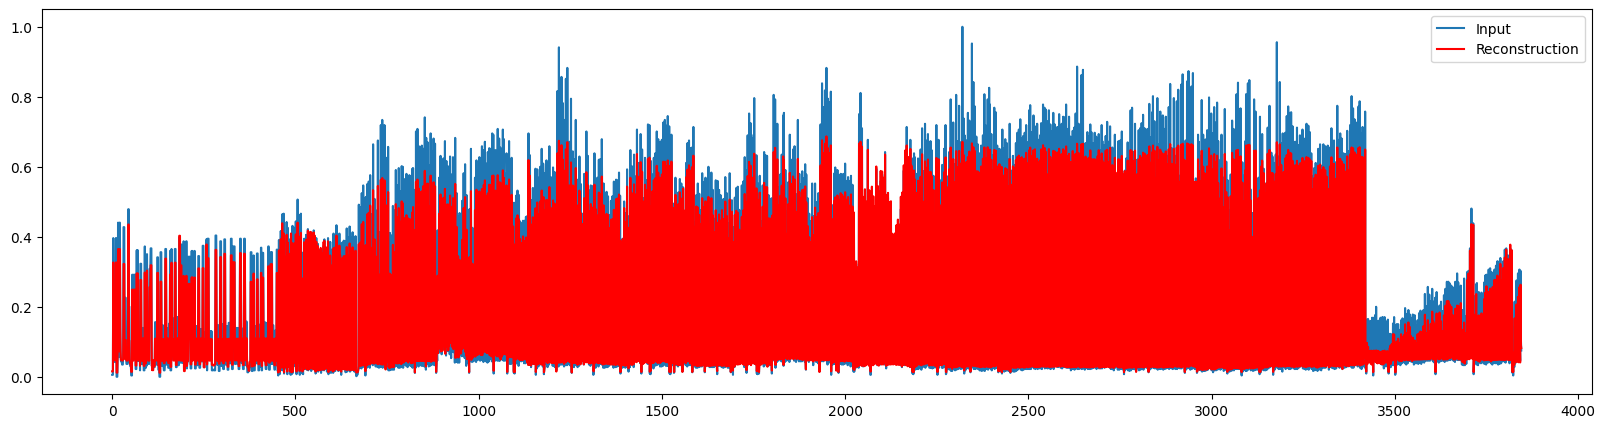

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

30


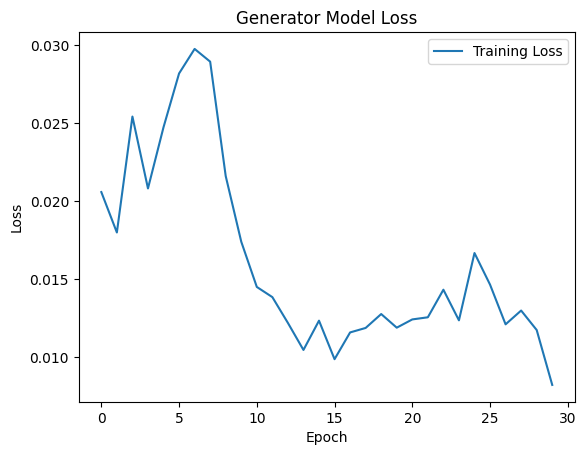

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3310].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

6.767729692538834


#*__With 1D 3 CNN Layers & 1 Dense Layer - Leaky ReLU activation function__*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=6, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=6, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(6, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


Epoch 1/300
85/85 [==============================] - 2s 6ms/step - loss: 0.6586 - accuracy: 0.6478 - val_loss: 0.6377 - val_accuracy: 0.6716
Epoch 2/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6474 - accuracy: 0.6516 - val_loss: 0.6331 - val_accuracy: 0.6716
Epoch 3/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6437 - accuracy: 0.6516 - val_loss: 0.6317 - val_accuracy: 0.6716
Epoch 4/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6419 - accuracy: 0.6516 - val_loss: 0.6302 - val_accuracy: 0.6716
Epoch 5/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6387 - accuracy: 0.6516 - val_loss: 0.6318 - val_accuracy: 0.6724
Epoch 6/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6346 - accuracy: 0.6512 - val_loss: 0.6261 - val_accuracy: 0.6716
Epoch 7/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6311 - accuracy: 0.6616 - val_loss: 0.6249 - val_accuracy: 0.6733
Epoch 8/300
8

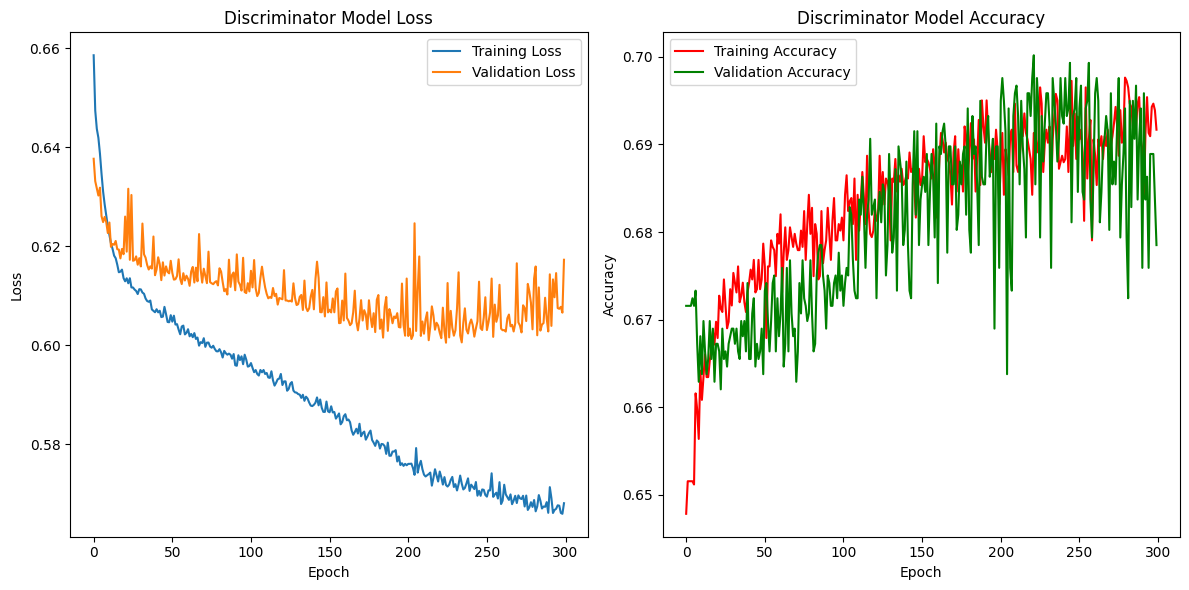

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Discriminator Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(history.history['accuracy'], label='Training Accuracy', color='red')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
ax2.set_title('Discriminator Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()

plt.show()

In [ ]:
max_epochs = 30
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE
Epoch 1 Starting
Epoch 1 DONE
Epoch 2 Starting
Epoch 2 DONE
Epoch 3 Starting
Epoch 3 DONE
Epoch 4 Starting
Epoch 4 DONE
Epoch 5 Starting
Epoch 5 DONE
Epoch 6 Starting
Epoch 6 DONE
Epoch 7 Starting
Epoch 7 DONE
Epoch 8 Starting
Epoch 8 DONE
Epoch 9 Starting
Epoch 9 DONE
Epoch 10 Starting
Epoch 10 DONE
Epoch 11 Starting
Epoch 11 DONE
Epoch 12 Starting
Epoch 12 DONE
Epoch 13 Starting
Epoch 13 DONE
Epoch 14 Starting
Epoch 14 DONE
Epoch 15 Starting
Epoch 15 DONE
Epoch 16 Starting
Epoch 16 DONE
Epoch 17 Starting
Epoch 17 DONE
Epoch 18 Starting
Epoch 18 DONE
Epoch 19 Starting
Epoch 19 DONE
Epoch 20 Starting
Epoch 20 DONE
Epoch 21 Starting
Epoch 21 DONE
Epoch 22 Starting
Epoch 22 DONE
Epoch 23 Starting
Epoch 23 DONE
Epoch 24 Starting
Epoch 24 DONE
Epoch 25 Starting
Epoch 25 DONE
Epoch 26 Starting
Epoch 26 DONE
Epoch 27 Starting
Epoch 27 DONE
Epoch 28 Starting
Epoch 28 DONE
Epoch 29 Starting
Epoch 29 DONE


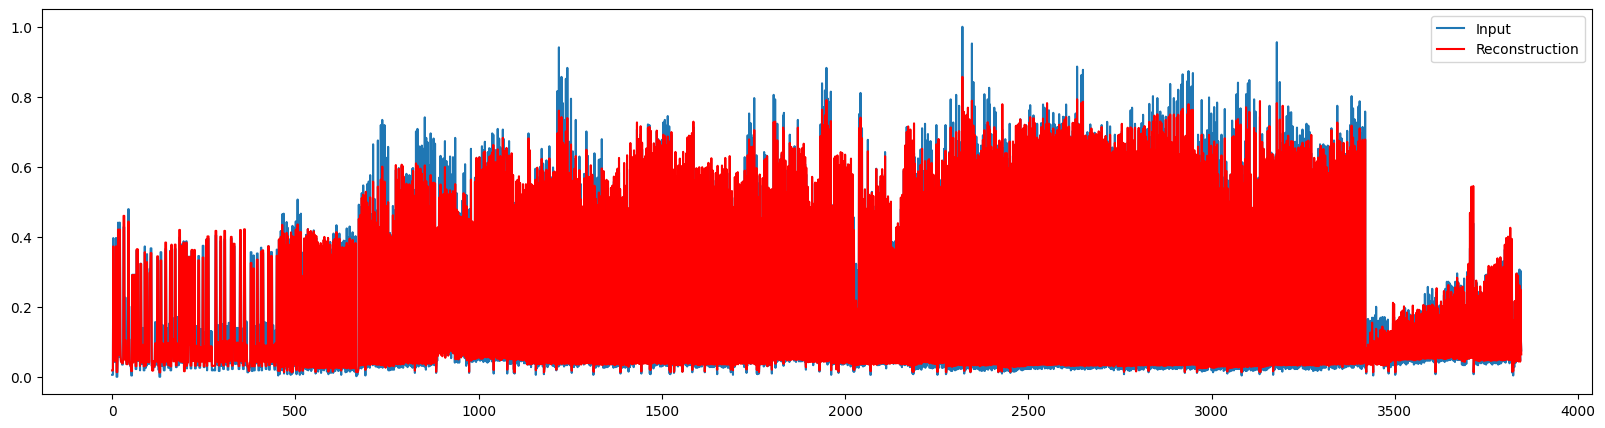

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

30


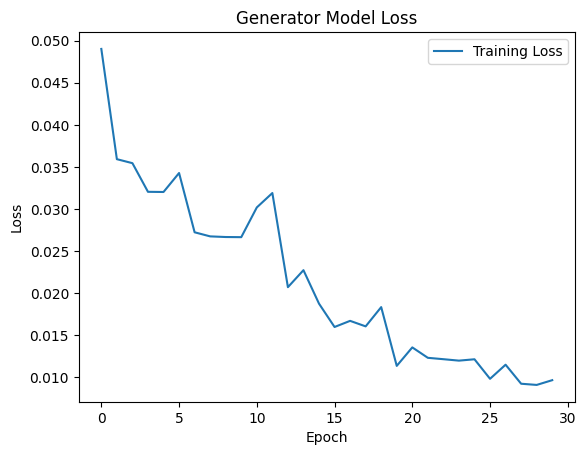

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3310].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

6.543538223475008


#*__With 1D 3 CNN Layers & 1 Dense Layer - Leaky ReLU activation function__*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=6, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(6, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


Epoch 1/300
85/85 [==============================] - 2s 10ms/step - loss: 0.6590 - accuracy: 0.6516 - val_loss: 0.6409 - val_accuracy: 0.6716
Epoch 2/300
85/85 [==============================] - 1s 6ms/step - loss: 0.6480 - accuracy: 0.6516 - val_loss: 0.6326 - val_accuracy: 0.6716
Epoch 3/300
85/85 [==============================] - 0s 6ms/step - loss: 0.6452 - accuracy: 0.6516 - val_loss: 0.6316 - val_accuracy: 0.6716
Epoch 4/300
85/85 [==============================] - 1s 7ms/step - loss: 0.6430 - accuracy: 0.6516 - val_loss: 0.6298 - val_accuracy: 0.6716
Epoch 5/300
85/85 [==============================] - 1s 6ms/step - loss: 0.6377 - accuracy: 0.6516 - val_loss: 0.6288 - val_accuracy: 0.6716
Epoch 6/300
85/85 [==============================] - 1s 6ms/step - loss: 0.6340 - accuracy: 0.6516 - val_loss: 0.6253 - val_accuracy: 0.6716
Epoch 7/300
85/85 [==============================] - 1s 7ms/step - loss: 0.6292 - accuracy: 0.6542 - val_loss: 0.6248 - val_accuracy: 0.6742
Epoch 8/300


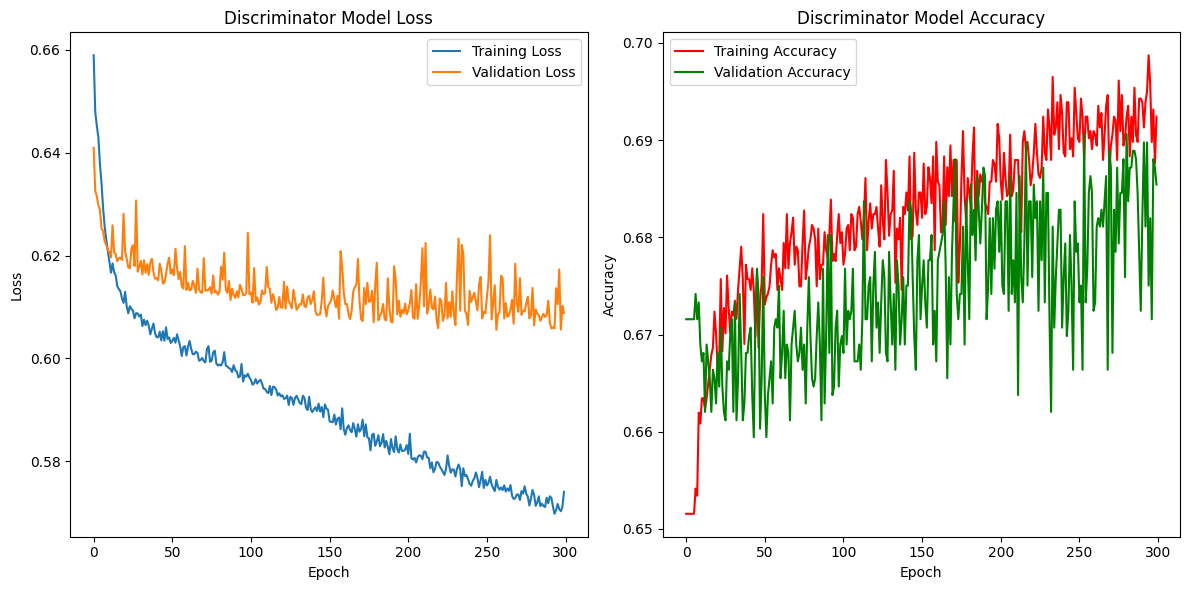

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Discriminator Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(history.history['accuracy'], label='Training Accuracy', color='red')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
ax2.set_title('Discriminator Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()

plt.show()

In [ ]:
max_epochs = 30
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE
Epoch 1 Starting
Epoch 1 DONE
Epoch 2 Starting
Epoch 2 DONE
Epoch 3 Starting
Epoch 3 DONE
Epoch 4 Starting
Epoch 4 DONE
Epoch 5 Starting
Epoch 5 DONE
Epoch 6 Starting
Epoch 6 DONE
Epoch 7 Starting
Epoch 7 DONE
Epoch 8 Starting
Epoch 8 DONE
Epoch 9 Starting
Epoch 9 DONE
Epoch 10 Starting
Epoch 10 DONE
Epoch 11 Starting
Epoch 11 DONE
Epoch 12 Starting
Epoch 12 DONE
Epoch 13 Starting
Epoch 13 DONE
Epoch 14 Starting
Epoch 14 DONE
Epoch 15 Starting
Epoch 15 DONE
Epoch 16 Starting
Epoch 16 DONE
Epoch 17 Starting
Epoch 17 DONE
Epoch 18 Starting
Epoch 18 DONE
Epoch 19 Starting
Epoch 19 DONE
Epoch 20 Starting
Epoch 20 DONE
Epoch 21 Starting
Epoch 21 DONE
Epoch 22 Starting
Epoch 22 DONE
Epoch 23 Starting
Epoch 23 DONE
Epoch 24 Starting
Epoch 24 DONE
Epoch 25 Starting
Epoch 25 DONE
Epoch 26 Starting
Epoch 26 DONE
Epoch 27 Starting
Epoch 27 DONE
Epoch 28 Starting
Epoch 28 DONE
Epoch 29 Starting
Epoch 29 DONE


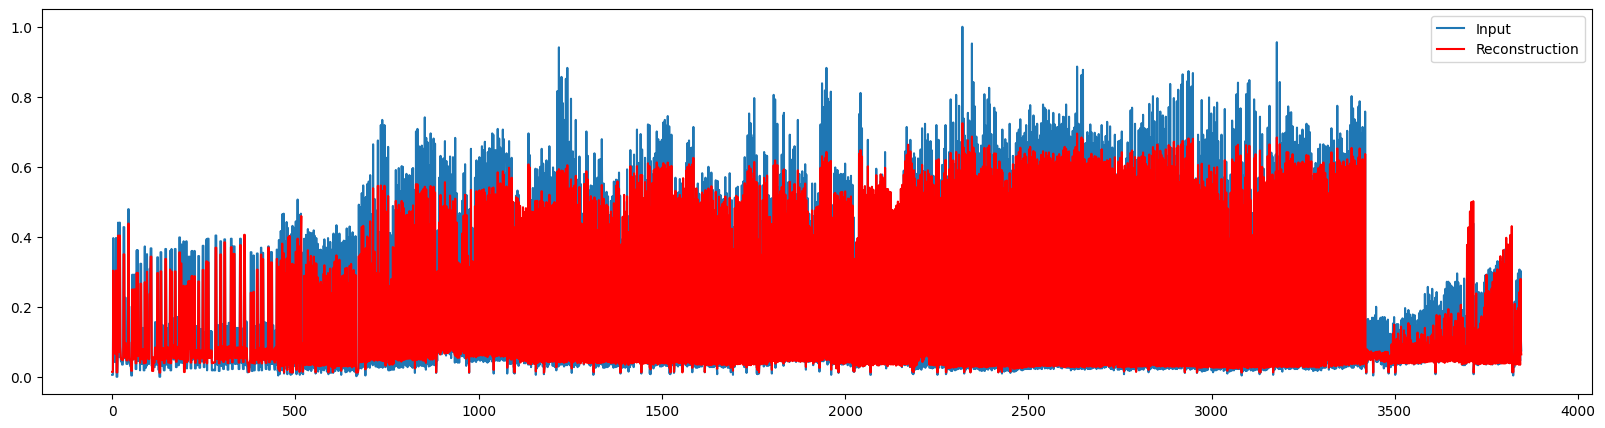

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

30


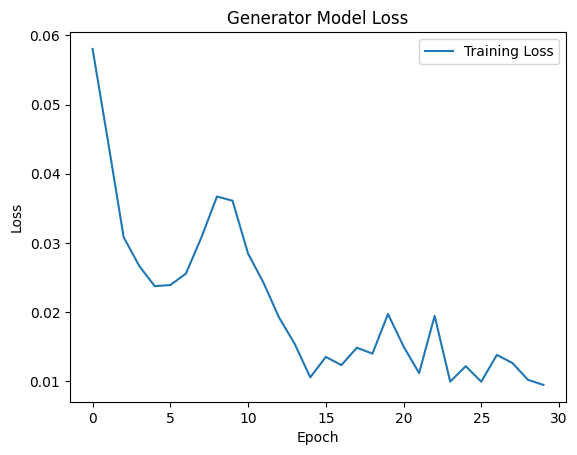

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3310].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

6.529729345781949


#*__With 1D 3 CNN Layers & 2 Dense Layer - Leaky ReLU activation function__*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(3,activation='LeakyReLU'),
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(3, activation="LeakyReLU"),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(3, activation="LeakyReLU"),
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


Epoch 1/300
85/85 [==============================] - 4s 7ms/step - loss: 0.6696 - accuracy: 0.6449 - val_loss: 0.6362 - val_accuracy: 0.6716
Epoch 2/300
85/85 [==============================] - 0s 3ms/step - loss: 0.6478 - accuracy: 0.6516 - val_loss: 0.6334 - val_accuracy: 0.6716
Epoch 3/300
85/85 [==============================] - 0s 3ms/step - loss: 0.6456 - accuracy: 0.6516 - val_loss: 0.6334 - val_accuracy: 0.6716
Epoch 4/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6438 - accuracy: 0.6516 - val_loss: 0.6319 - val_accuracy: 0.6716
Epoch 5/300
85/85 [==============================] - 0s 3ms/step - loss: 0.6420 - accuracy: 0.6516 - val_loss: 0.6313 - val_accuracy: 0.6716
Epoch 6/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6389 - accuracy: 0.6516 - val_loss: 0.6277 - val_accuracy: 0.6716
Epoch 7/300
85/85 [==============================] - 0s 3ms/step - loss: 0.6369 - accuracy: 0.6516 - val_loss: 0.6258 - val_accuracy: 0.6716
Epoch 8/300
8

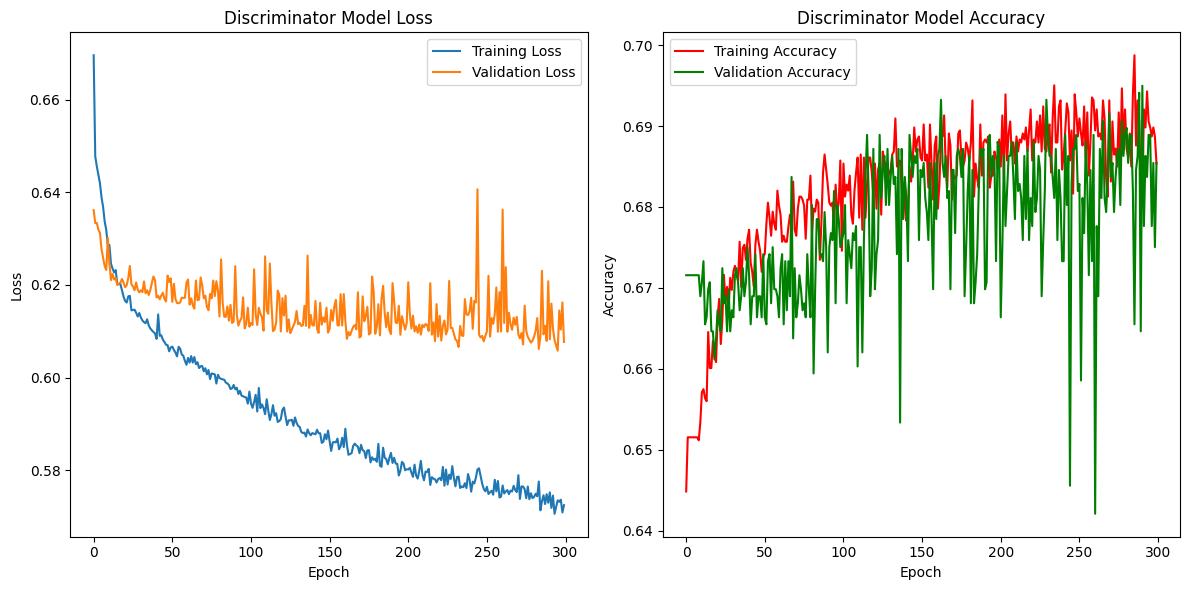

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Discriminator Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(history.history['accuracy'], label='Training Accuracy', color='red')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
ax2.set_title('Discriminator Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()

plt.show()

In [ ]:
max_epochs = 30
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE
Epoch 1 Starting
Epoch 1 DONE
Epoch 2 Starting
Epoch 2 DONE
Epoch 3 Starting
Epoch 3 DONE
Epoch 4 Starting
Epoch 4 DONE
Epoch 5 Starting
Epoch 5 DONE
Epoch 6 Starting
Epoch 6 DONE
Epoch 7 Starting
Epoch 7 DONE
Epoch 8 Starting
Epoch 8 DONE
Epoch 9 Starting
Epoch 9 DONE
Epoch 10 Starting
Epoch 10 DONE
Epoch 11 Starting
Epoch 11 DONE
Epoch 12 Starting
Epoch 12 DONE
Epoch 13 Starting
Epoch 13 DONE
Epoch 14 Starting
Epoch 14 DONE
Epoch 15 Starting
Epoch 15 DONE
Epoch 16 Starting
Epoch 16 DONE
Epoch 17 Starting
Epoch 17 DONE
Epoch 18 Starting
Epoch 18 DONE
Epoch 19 Starting
Epoch 19 DONE
Epoch 20 Starting
Epoch 20 DONE
Epoch 21 Starting
Epoch 21 DONE
Epoch 22 Starting
Epoch 22 DONE
Epoch 23 Starting
Epoch 23 DONE
Epoch 24 Starting
Epoch 24 DONE
Epoch 25 Starting
Epoch 25 DONE
Epoch 26 Starting
Epoch 26 DONE
Epoch 27 Starting
Epoch 27 DONE
Epoch 28 Starting
Epoch 28 DONE
Epoch 29 Starting
Epoch 29 DONE


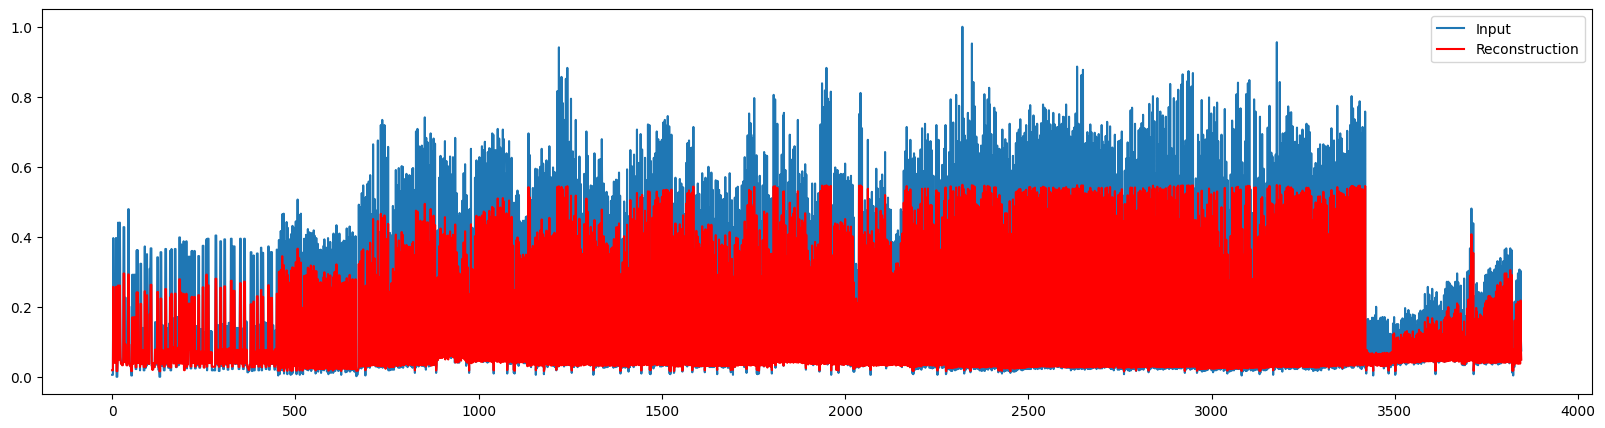

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

30


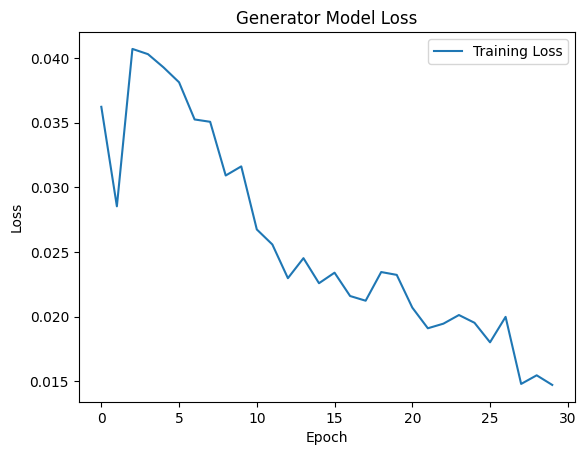

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3310].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

6.271554850846972


#*__With 1D 3 CNN Layers & 2 Dense Layer - Leaky ReLU activation function__*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=20, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(5,activation='LeakyReLU'),
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=20, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(10, activation="LeakyReLU"),
      tf.keras.layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


Epoch 1/300
85/85 [==============================] - 2s 8ms/step - loss: 0.6537 - accuracy: 0.6516 - val_loss: 0.6331 - val_accuracy: 0.6716
Epoch 2/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6447 - accuracy: 0.6516 - val_loss: 0.6327 - val_accuracy: 0.6716
Epoch 3/300
85/85 [==============================] - 1s 6ms/step - loss: 0.6421 - accuracy: 0.6516 - val_loss: 0.6322 - val_accuracy: 0.6716
Epoch 4/300
85/85 [==============================] - 1s 6ms/step - loss: 0.6399 - accuracy: 0.6516 - val_loss: 0.6294 - val_accuracy: 0.6716
Epoch 5/300
85/85 [==============================] - 0s 6ms/step - loss: 0.6317 - accuracy: 0.6519 - val_loss: 0.6223 - val_accuracy: 0.6716
Epoch 6/300
85/85 [==============================] - 1s 6ms/step - loss: 0.6277 - accuracy: 0.6553 - val_loss: 0.6230 - val_accuracy: 0.6681
Epoch 7/300
85/85 [==============================] - 1s 7ms/step - loss: 0.6220 - accuracy: 0.6620 - val_loss: 0.6386 - val_accuracy: 0.6378
Epoch 8/300
8

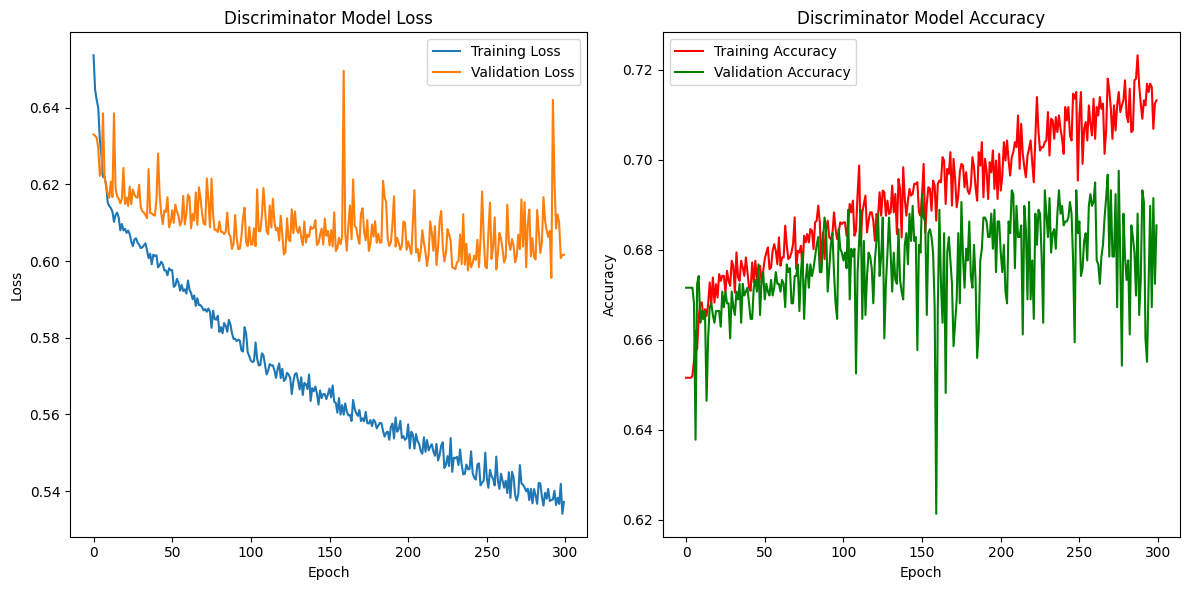

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Discriminator Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(history.history['accuracy'], label='Training Accuracy', color='red')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
ax2.set_title('Discriminator Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()

plt.show()

In [ ]:
max_epochs = 30
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE
Epoch 1 Starting
Epoch 1 DONE
Epoch 2 Starting
Epoch 2 DONE
Epoch 3 Starting
Epoch 3 DONE
Epoch 4 Starting
Epoch 4 DONE
Epoch 5 Starting
Epoch 5 DONE
Epoch 6 Starting
Epoch 6 DONE
Epoch 7 Starting
Epoch 7 DONE
Epoch 8 Starting
Epoch 8 DONE
Epoch 9 Starting
Epoch 9 DONE
Epoch 10 Starting
Epoch 10 DONE
Epoch 11 Starting
Epoch 11 DONE
Epoch 12 Starting
Epoch 12 DONE
Epoch 13 Starting
Epoch 13 DONE
Epoch 14 Starting
Epoch 14 DONE
Epoch 15 Starting
Epoch 15 DONE
Epoch 16 Starting
Epoch 16 DONE
Epoch 17 Starting
Epoch 17 DONE
Epoch 18 Starting
Epoch 18 DONE
Epoch 19 Starting
Epoch 19 DONE
Epoch 20 Starting
Epoch 20 DONE
Epoch 21 Starting
Epoch 21 DONE
Epoch 22 Starting
Epoch 22 DONE
Epoch 23 Starting
Epoch 23 DONE
Epoch 24 Starting
Epoch 24 DONE
Epoch 25 Starting
Epoch 25 DONE
Epoch 26 Starting
Epoch 26 DONE
Epoch 27 Starting
Epoch 27 DONE
Epoch 28 Starting
Epoch 28 DONE
Epoch 29 Starting
Epoch 29 DONE


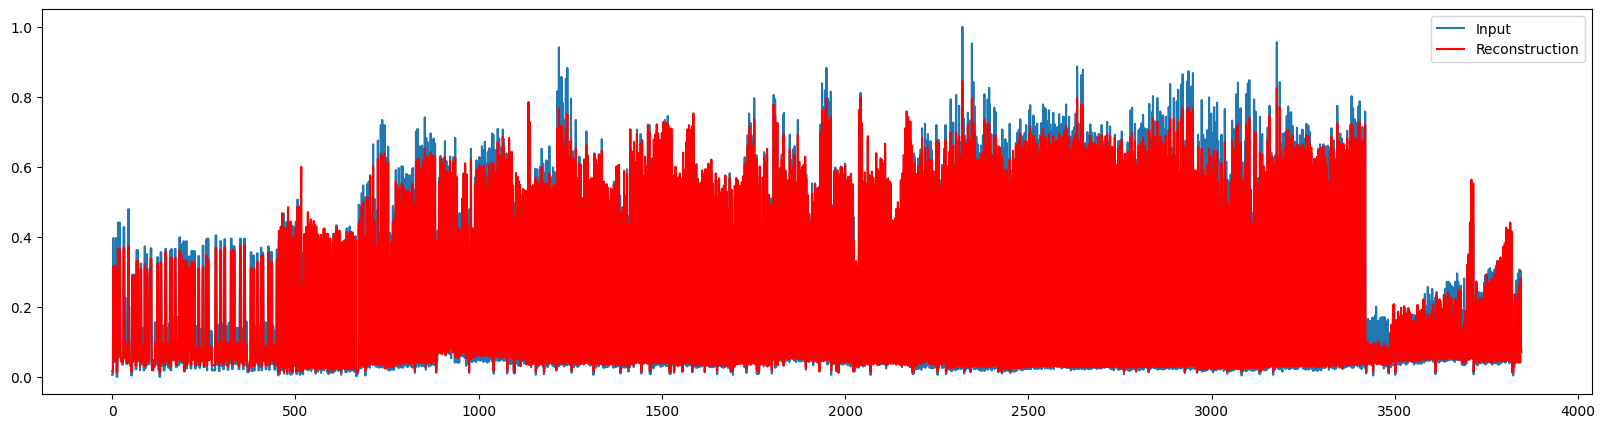

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

30


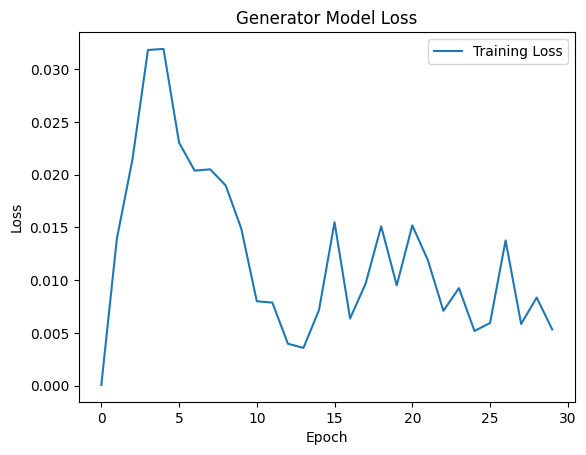

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3310].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

6.579014134808515


#*__With 1D 4 CNN Layers & 1 Dense Layer - Leaky ReLU activation function__*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Conv1D(filters=3, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Conv1D(filters=3, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(3, activation="LeakyReLU"),
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


Epoch 1/300
85/85 [==============================] - 2s 6ms/step - loss: 0.6566 - accuracy: 0.6516 - val_loss: 0.6377 - val_accuracy: 0.6716
Epoch 2/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6482 - accuracy: 0.6516 - val_loss: 0.6352 - val_accuracy: 0.6716
Epoch 3/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6456 - accuracy: 0.6516 - val_loss: 0.6366 - val_accuracy: 0.6716
Epoch 4/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6446 - accuracy: 0.6516 - val_loss: 0.6327 - val_accuracy: 0.6716
Epoch 5/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6429 - accuracy: 0.6516 - val_loss: 0.6314 - val_accuracy: 0.6716
Epoch 6/300
85/85 [==============================] - 1s 6ms/step - loss: 0.6415 - accuracy: 0.6516 - val_loss: 0.6290 - val_accuracy: 0.6716
Epoch 7/300
85/85 [==============================] - 0s 5ms/step - loss: 0.6393 - accuracy: 0.6523 - val_loss: 0.6277 - val_accuracy: 0.6716
Epoch 8/300
8

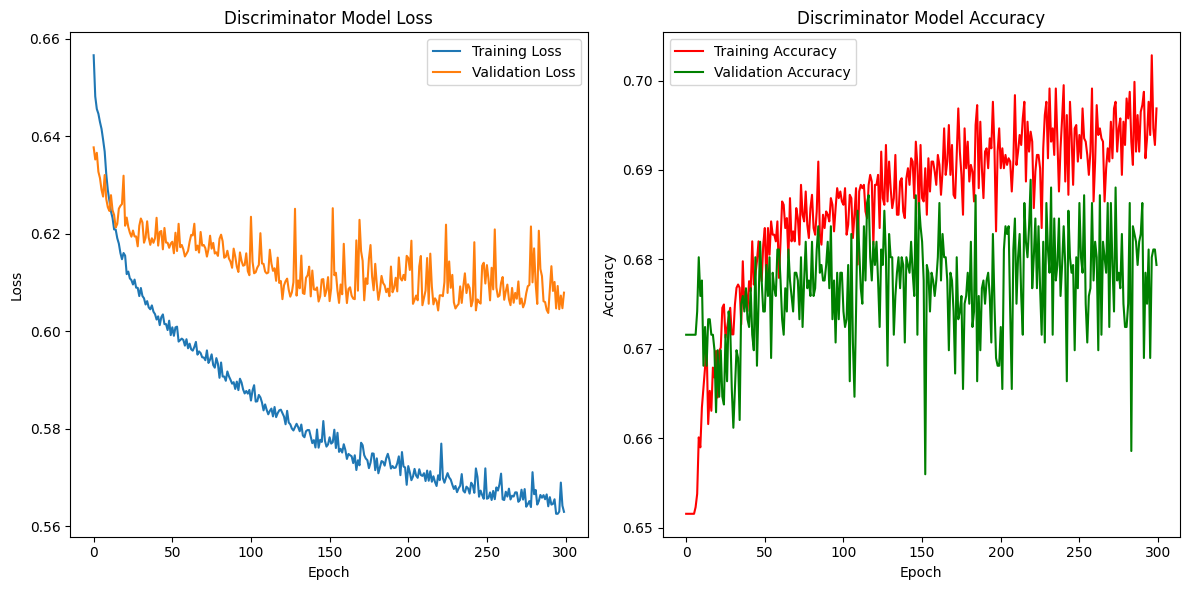

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Discriminator Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(history.history['accuracy'], label='Training Accuracy', color='red')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
ax2.set_title('Discriminator Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()

plt.show()

In [ ]:
max_epochs = 30
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE
Epoch 1 Starting
Epoch 1 DONE
Epoch 2 Starting
Epoch 2 DONE
Epoch 3 Starting
Epoch 3 DONE
Epoch 4 Starting
Epoch 4 DONE
Epoch 5 Starting
Epoch 5 DONE
Epoch 6 Starting
Epoch 6 DONE
Epoch 7 Starting
Epoch 7 DONE
Epoch 8 Starting
Epoch 8 DONE
Epoch 9 Starting
Epoch 9 DONE
Epoch 10 Starting
Epoch 10 DONE
Epoch 11 Starting
Epoch 11 DONE
Epoch 12 Starting
Epoch 12 DONE
Epoch 13 Starting
Epoch 13 DONE
Epoch 14 Starting
Epoch 14 DONE
Epoch 15 Starting
Epoch 15 DONE
Epoch 16 Starting
Epoch 16 DONE
Epoch 17 Starting
Epoch 17 DONE
Epoch 18 Starting
Epoch 18 DONE
Epoch 19 Starting
Epoch 19 DONE
Epoch 20 Starting
Epoch 20 DONE
Epoch 21 Starting
Epoch 21 DONE
Epoch 22 Starting
Epoch 22 DONE
Epoch 23 Starting
Epoch 23 DONE
Epoch 24 Starting
Epoch 24 DONE
Epoch 25 Starting
Epoch 25 DONE
Epoch 26 Starting
Epoch 26 DONE
Epoch 27 Starting
Epoch 27 DONE
Epoch 28 Starting
Epoch 28 DONE
Epoch 29 Starting
Epoch 29 DONE


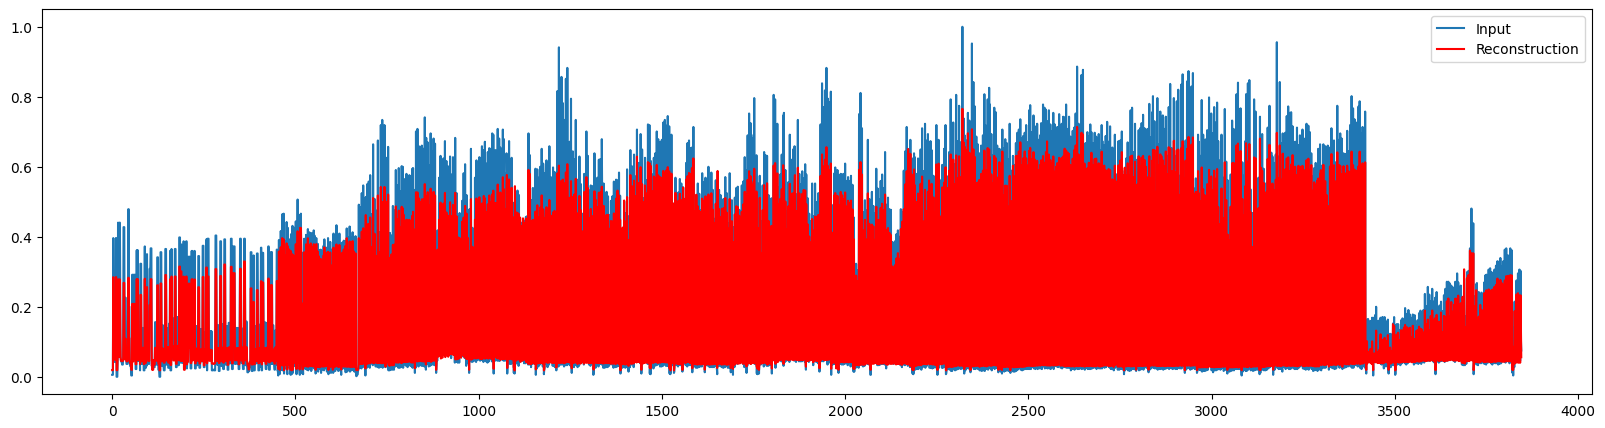

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

30


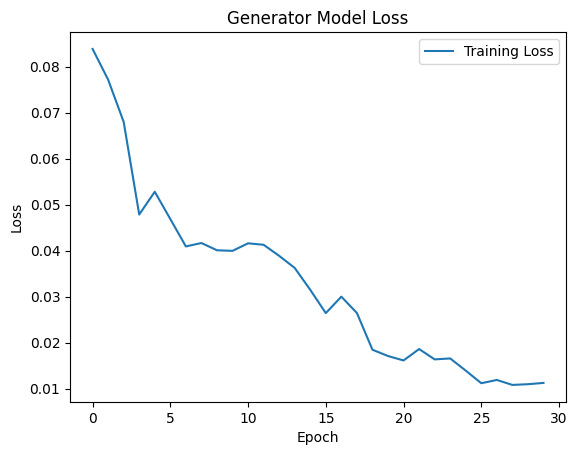

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3310].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

6.086120749342471


#*__With 1D 4 CNN Layers & 1 Dense Layer - Leaky ReLU activation function__*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=20, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=20, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(10, activation="LeakyReLU"),
      tf.keras.layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


Epoch 1/300
85/85 [==============================] - 2s 7ms/step - loss: 0.6602 - accuracy: 0.6508 - val_loss: 0.6394 - val_accuracy: 0.6716
Epoch 2/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6477 - accuracy: 0.6516 - val_loss: 0.6346 - val_accuracy: 0.6716
Epoch 3/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6445 - accuracy: 0.6516 - val_loss: 0.6326 - val_accuracy: 0.6716
Epoch 4/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6407 - accuracy: 0.6516 - val_loss: 0.6288 - val_accuracy: 0.6716
Epoch 5/300
85/85 [==============================] - 0s 5ms/step - loss: 0.6372 - accuracy: 0.6523 - val_loss: 0.6293 - val_accuracy: 0.6750
Epoch 6/300
85/85 [==============================] - 0s 4ms/step - loss: 0.6323 - accuracy: 0.6527 - val_loss: 0.6255 - val_accuracy: 0.6716
Epoch 7/300
85/85 [==============================] - 0s 5ms/step - loss: 0.6298 - accuracy: 0.6571 - val_loss: 0.6250 - val_accuracy: 0.6707
Epoch 8/300
8

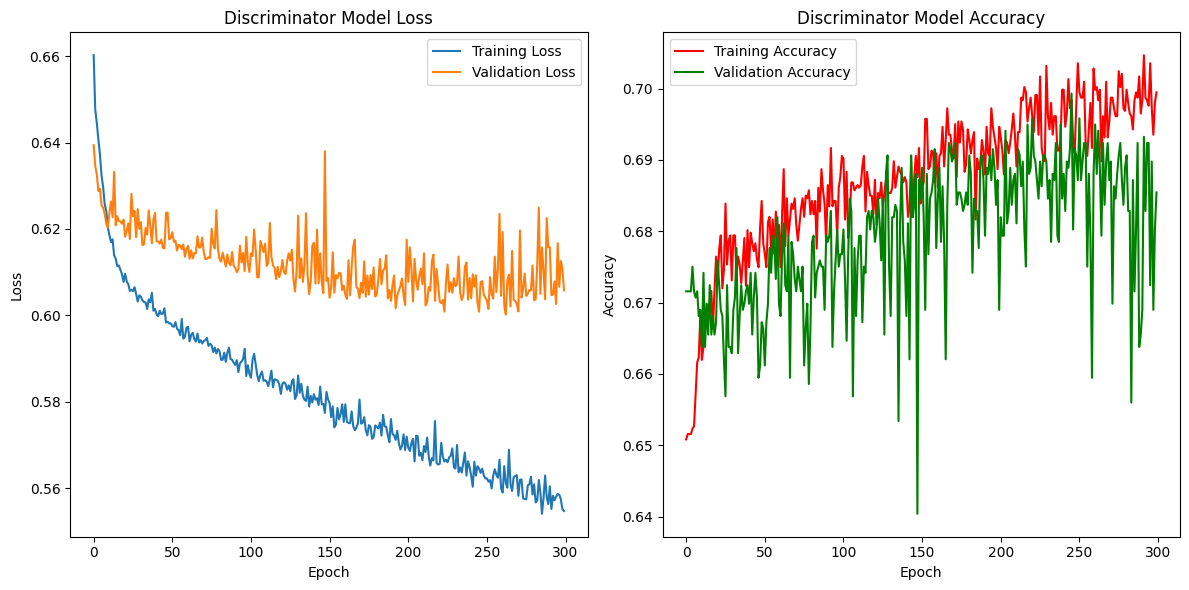

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Discriminator Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(history.history['accuracy'], label='Training Accuracy', color='red')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
ax2.set_title('Discriminator Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()

plt.show()

In [ ]:
max_epochs = 30
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE
Epoch 1 Starting
Epoch 1 DONE
Epoch 2 Starting
Epoch 2 DONE
Epoch 3 Starting
Epoch 3 DONE
Epoch 4 Starting
Epoch 4 DONE
Epoch 5 Starting
Epoch 5 DONE
Epoch 6 Starting
Epoch 6 DONE
Epoch 7 Starting
Epoch 7 DONE
Epoch 8 Starting
Epoch 8 DONE
Epoch 9 Starting
Epoch 9 DONE
Epoch 10 Starting
Epoch 10 DONE
Epoch 11 Starting
Epoch 11 DONE
Epoch 12 Starting
Epoch 12 DONE
Epoch 13 Starting
Epoch 13 DONE
Epoch 14 Starting
Epoch 14 DONE
Epoch 15 Starting
Epoch 15 DONE
Epoch 16 Starting
Epoch 16 DONE
Epoch 17 Starting
Epoch 17 DONE
Epoch 18 Starting
Epoch 18 DONE
Epoch 19 Starting
Epoch 19 DONE
Epoch 20 Starting
Epoch 20 DONE
Epoch 21 Starting
Epoch 21 DONE
Epoch 22 Starting
Epoch 22 DONE
Epoch 23 Starting
Epoch 23 DONE
Epoch 24 Starting
Epoch 24 DONE
Epoch 25 Starting
Epoch 25 DONE
Epoch 26 Starting
Epoch 26 DONE
Epoch 27 Starting
Epoch 27 DONE
Epoch 28 Starting
Epoch 28 DONE
Epoch 29 Starting
Epoch 29 DONE


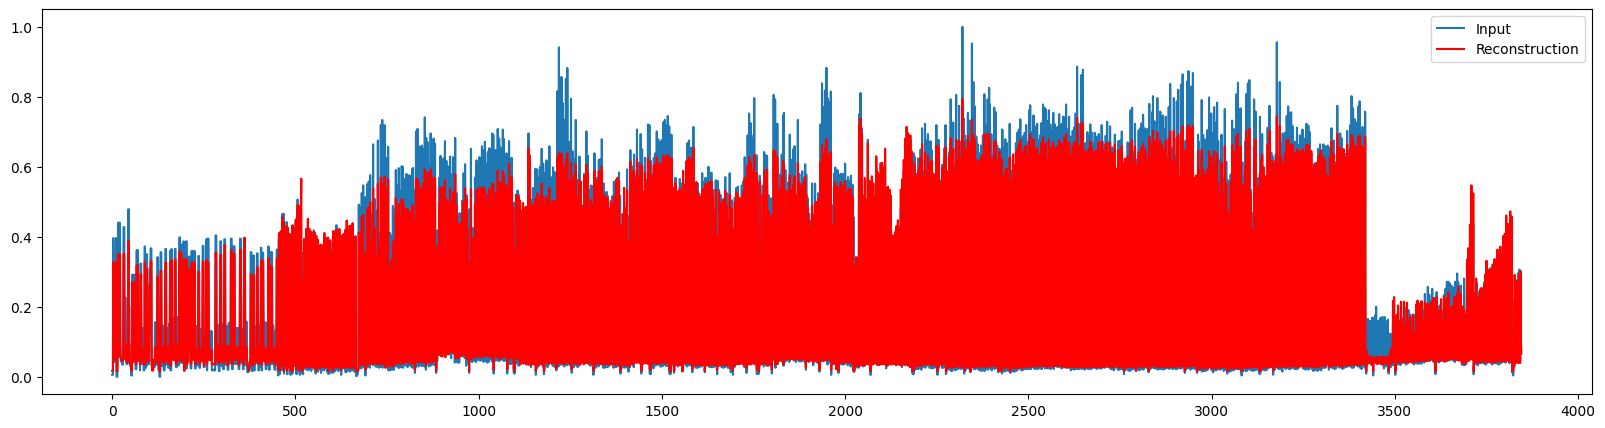

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

30


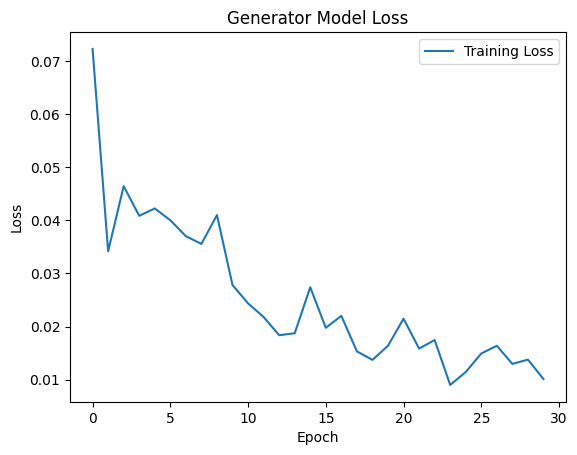

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3310].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

6.538207839304905
